<b>Author:</b><a href="https://github.com/doctorget"> Samuel Soares</a>

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.0.0

In [2]:

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

ImportError: Traceback (most recent call last):
  File "C:\Users\samusilv\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\samusilv\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\samusilv\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\samusilv\AppData\Local\Continuum\anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\samusilv\AppData\Local\Continuum\anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: Não foi possível encontrar o módulo especificado.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

0


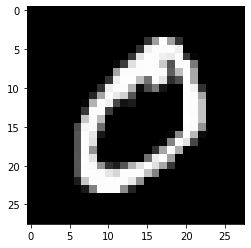

In [3]:
print(y_train[1])
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [4]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [5]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest')

In [ ]:
datagen.flow(x, batch_size=1, save_to_dir = 'data-train/'+folder, save_prefix = name, save_format = 'jpeg'):

In [ ]:
# RESHAPE
input_shape = [28, 28, 1]

X_train = tf.reshape(X_train, [X_train.shape[0]] + input_shape)
X_test = tf.reshape(X_test, [X_test.shape[0]] + input_shape)

X_train = tf.cast(X_train, dtype=tf.float32)
X_test = tf.cast(X_test, dtype=tf.float32)

In [ ]:
X_train

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
def show_distribution(labels):
  # Convert tensor to a list.
  labels_list = list(labels)
  num_classes = len(set(labels_list))
  # Populate distribution list.
  distribution = [labels_list.count(i) for i in range(num_classes)]
  # Visualise.
  y_index = range(num_classes)
  plt.bar(y_index, distribution, align='center')
  plt.xticks(y_index, sorted(set(labels_list)))
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
show_distribution(y_train)

In [ ]:
y_train = tf.reshape(y_train, [-1, 1])
y_test = tf.reshape(y_test, [-1, 1])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Set sparse to False in order to return an array.
encoder = OneHotEncoder(sparse=False)

y_train = tf.convert_to_tensor(encoder.fit_transform(y_train))
y_test = tf.convert_to_tensor(encoder.fit_transform(y_test))

In [ ]:
class MNISTModel(tf.keras.Model):
  def __init__(self):
    super(MNISTModel, self).__init__()
    # Declare Layers Individually.
    self.conv = tf.keras.layers.Conv2D(28, kernel_size=(3, 3), input_shape=input_shape)
    self.max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.flatten = tf.keras.layers.Flatten()
    self.fc1 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
    self.fc1 = tf.keras.layers.Dense(256, activation=tf.nn.relu)
    self.fc2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

  def call(self, inputs):
    t = self.conv(inputs)
    t = self.max_pool(t)
    t = self.flatten(t)
    t = self.fc1(t)
    return self.fc2(t)

In [ ]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [ ]:
model = MNISTModel()
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [ ]:
h = model.fit(x=X_train, y=y_train, epochs=13, validation_data=(X_test, y_test), batch_size=32)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

In [ ]:
model.save_weights('mnist_model.h5')
#model.save('mnist_model', save_format='h5')

In [ ]:
!ls /content/mnist_model.h5

In [ ]:
from google.colab import files
files.download('mnist_model.h5') 

In [6]:
!pip install tensorflowjs

  Using cached tensorflowjs-1.7.4.post1-py3-none-any.whl (57 kB)
  Using cached PyInquirer-1.0.3.tar.gz (27 kB)
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-py3-none-any.whl size=32854 sha256=91513b191f9e29bfd2a4c9de955ea23071bec43a230dc2500e5f838e44a25f5e
  Stored in directory: c:\users\samusilv\appdata\local\pip\cache\wheels\89\3b\7b\8b3cc8ac47137eabaeb6937a3ff0d33e78a12e2ba1e3ad4ba1
Successfully built PyInquirer
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Attempting uninstall: prompt-toolkit
    F

ERROR: tensorflow 2.1.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.2.1 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorflow-estimator<2.2.0,>=2.1.0rc0, but you'll have tensorflow-estimator 2.2.0 which is incompatible.
ERROR: jupyter-console 6.0.0 has requirement prompt_toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.14 which is incompatible.
ERROR: ipython 7.8.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.14 which is incompatible.
ERROR: tensorflow-cpu 2.2.0 has requirement h5py<2.11.0,>=2.10.0, but you'll have h5py 2.9.0 which is incompatible.
You should consider upgrading via the 'c:\users\samusilv\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
# https://www.tensorflow.org/js/tutorials/conversion/import_keras
!tensorflowjs_converter --input_format keras \
                       /content/mnist_model.h5 \
                       /content/json

#### Referências: https://codelabs.developers.google.com/codelabs/tensorflowjs-teachablemachine-codelab/index.html#0